In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,classification_report
import pickle
from sklearn.preprocessing import LabelEncoder

In [158]:
redwine = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Red_Wine_Quality\Dataset\winequality-red.csv')

In [80]:
redwine.shape

(1599, 12)

In [81]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [83]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


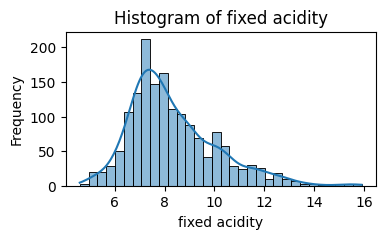

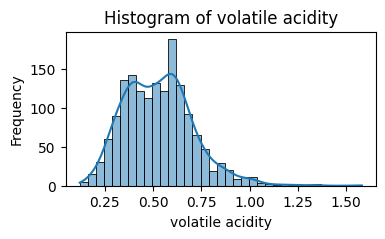

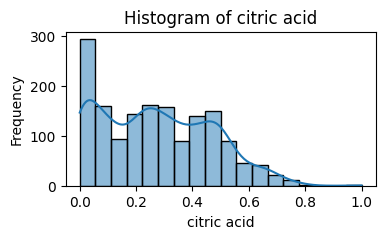

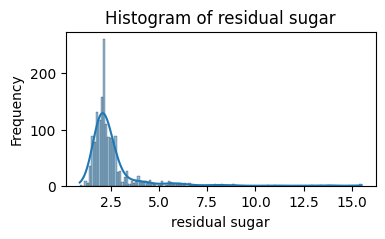

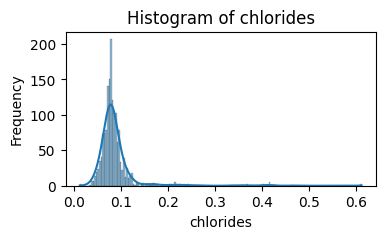

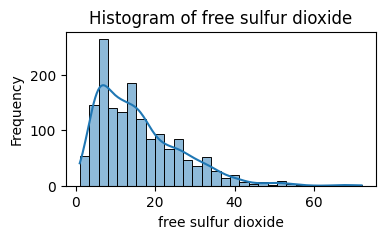

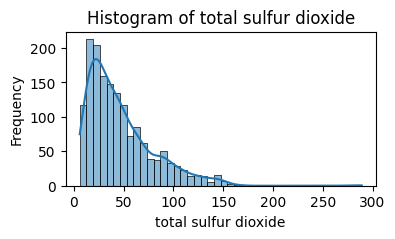

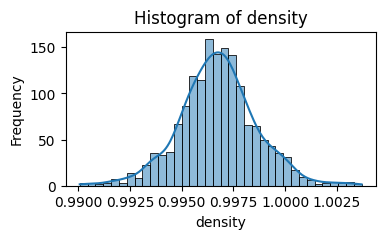

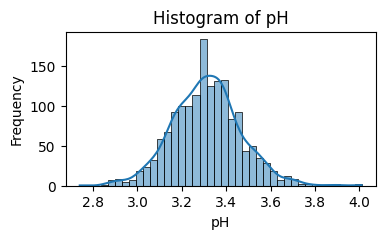

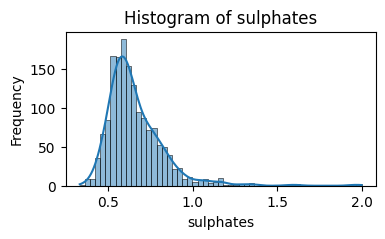

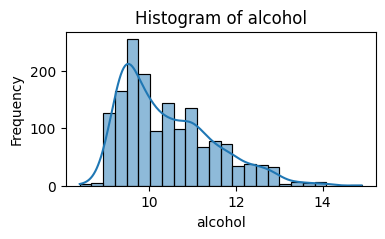

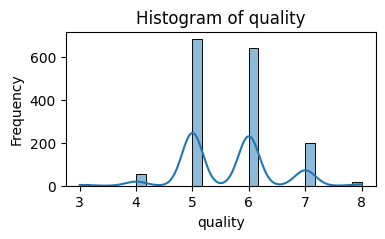

In [84]:
for column in redwine.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(redwine[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

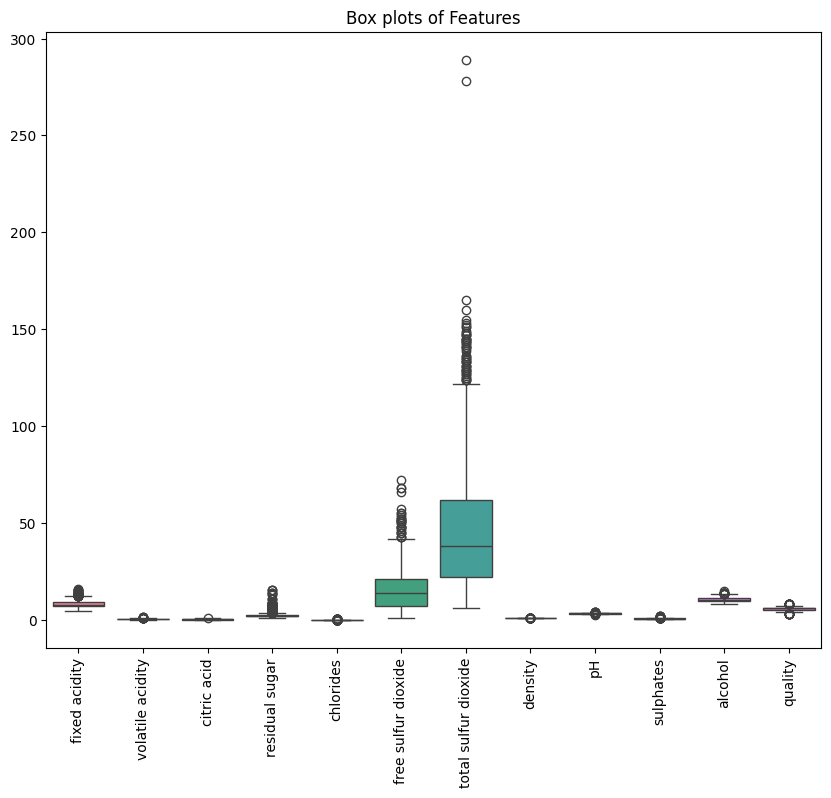

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=redwine)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

In [159]:
features = redwine.select_dtypes(include=['float64']).columns
for column in features:
    redwine[f'{column}_winsorized'] = winsorize(redwine[column], limits=[0.05, 0.05])
    redwine.drop([column], axis=1, inplace=True)

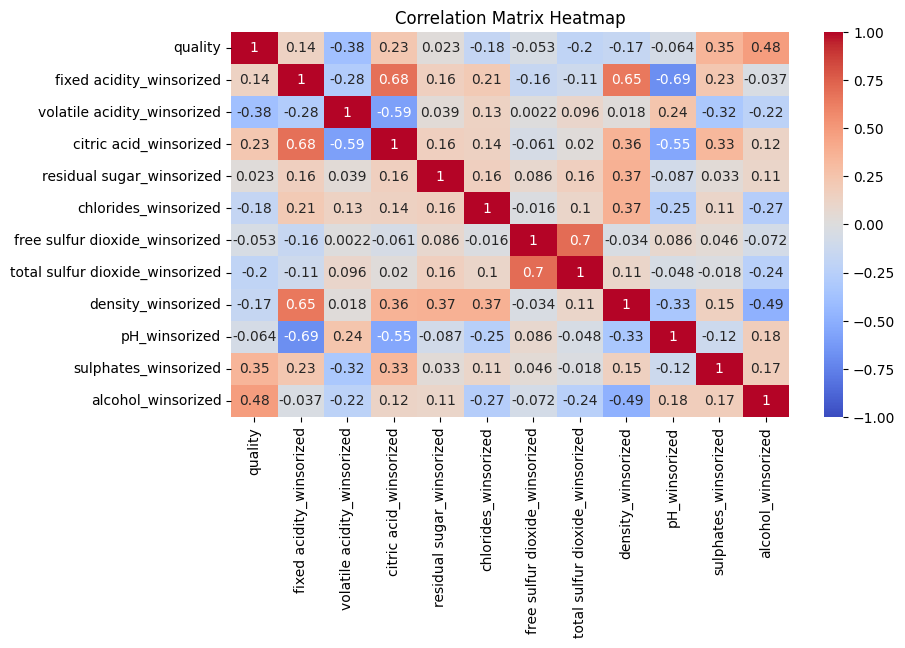

In [160]:
# Select numerical columns
numerical_columns = redwine.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [161]:
redwine['quality_binary'] = redwine['quality'].apply(lambda x: 1 if x >= 6 else 0)
redwine.drop(['quality'], axis=1, inplace=True)

In [162]:
redwine['quality_binary'].value_counts()

quality_binary
1    855
0    744
Name: count, dtype: int64

In [163]:
X = redwine.drop('quality_binary', axis=1)
y=redwine['quality_binary']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 fixed acidity_winsorized           0.067885
volatile acidity_winsorized        0.107037
citric acid_winsorized             0.067970
residual sugar_winsorized          0.051727
chlorides_winsorized               0.075760
free sulfur dioxide_winsorized     0.059826
total sulfur dioxide_winsorized    0.099433
density_winsorized                 0.092586
pH_winsorized                      0.068849
sulphates_winsorized               0.130646
alcohol_winsorized                 0.178279
dtype: float64


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [203]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1439, 11) (160, 11) (1439,) (160,)


In [204]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
# Define the random forest classifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)
classification_report_result = classification_report(y_test, y_pred_2)
accuracy = accuracy_score(y_test, y_pred_2)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification report:\n", classification_report_result)

Confusion Matrix:
 [[58 14]
 [12 76]]
Accuracy: 0.8375
Precision: 0.8444444444444444
Recall: 0.8636363636363636
F1-score: 0.853932584269663
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        72
           1       0.84      0.86      0.85        88

    accuracy                           0.84       160
   macro avg       0.84      0.83      0.84       160
weighted avg       0.84      0.84      0.84       160



In [207]:
pickle.dump(scaler, open('scalar.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))